In [ ]:
%matplotlib notebook

import sys

#Own packages.
if __name__ == "__main__" and __package__ is None:
    from sys import path
    from os.path import dirname as dir
    path.insert(0, "..")
#     path.append(dir(dir(dir(path[0]))))
#     path.append(dir(path[0]))
    
from src import formatting_helpers
from src import visualisation_helpers

from IPython.core.display import HTML, Math, Markdown
import igraph
import cairo
import pandas as pd
import numpy as np
import itertools
from io import BytesIO
from PIL import Image

# Adjacency Matrices for Graph
_<u>Source</u>: P76 WOrked Exampled 2.4A_

In the following examples, we generate 3 graphs.
- **G1** has a bridge between Node 1 and Node 2.
- **G2** removes that bridge.
- **G3** is like **G2**, but with a loop for Node 0.

Observe how the adjanency matrices of **G1**, **G2**, and **G3** change thru various iterations.

In [ ]:
#Helper function. Consider putting in src only if it becomes generalisable.
def plot_graphAndIterations(edge_list, number_of_iterations):
    
    '''
    Params
    edge_list: list of tuples.
    number_of_iterations: positive integer.
    
    Output
    Print
    Return iGraph
    '''
    
    #Create graph object
    G = igraph.Graph.TupleList(edge_list)
    
    #Create labels for vertices in graph object
    for vertex in G.vs:
        vertex['label'] = vertex['name']
    
    G_plot = igraph.plot(G, bbox=(120,120))
    
    display(G_plot)
    
    G_adjMatrix = np.array(G.get_adjacency()._get_data())
    
    for iter_idx in range(1, number_of_iterations+1):
        G_adjMatrixIterated = np.linalg.matrix_power(G_adjMatrix, iter_idx)
        display(HTML('<p><b>Adjacency Matrix after {} Iteration(s)</b></p>'.format(iter_idx)))
        display(Math(formatting_helpers.npMatrix_to_latex(G_adjMatrixIterated)))
    
    return G, G_adjMatrix

### **G1** has a bridge between Node 1 and Node 2

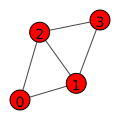

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
edge_list1 = pd.DataFrame({'source':[0,0,1,1,2], 
                           'target':[1,2,2,3,3]})
edge_list1_tuples = [tuple(x) for x in edge_list1.values]

G1, G1_adjMatrix = plot_graphAndIterations(edge_list=edge_list1_tuples, number_of_iterations=5)

### **G2** removes that bridge

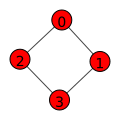

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
edge_list2 = pd.DataFrame({'source':[0,0,1,2], 
                           'target':[1,2,3,3]})
edge_list2_tuples = [tuple(x) for x in edge_list2.values]

G2, G2_adjMatrix = plot_graphAndIterations(edge_list=edge_list2_tuples, number_of_iterations=5)

### **G3** is like **G2**, but with a loop for Node 1

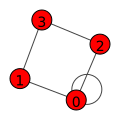

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
edge_list3 = pd.DataFrame({'source':[0,0,1,2,0], 
                           'target':[1,2,3,3,0]})
edge_list3_tuples = [tuple(x) for x in edge_list3.values]

G3, G3_adjMatrix = plot_graphAndIterations(edge_list=edge_list3_tuples, number_of_iterations=3)

In [ ]:
row = 0
col = 3

vectors = dict()
for idx, adjMatrix in enumerate([G1_adjMatrix, G2_adjMatrix, G3_adjMatrix]):
    vectors[idx] = {row: adjMatrix[row,:], col: adjMatrix[:,col]}

iteration_number = 2

<IPython.core.display.Javascript object>


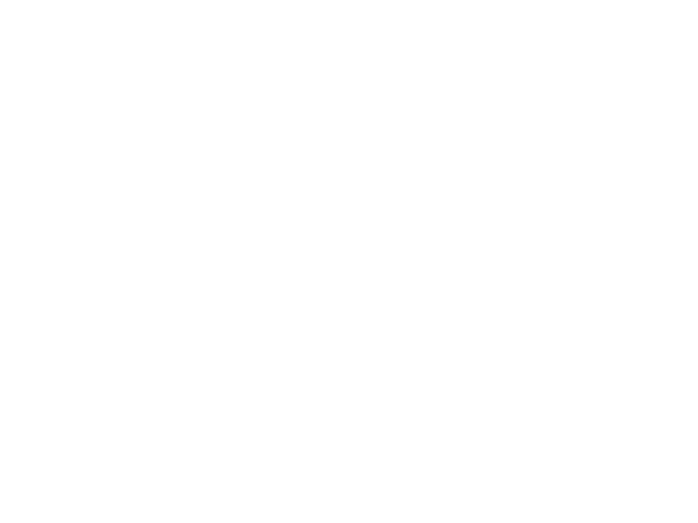

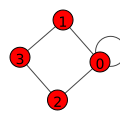

In [ ]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import itertools

def plot_previousIterationAdjMatrix(G_adjMatrix, iteration_number, row_number, col_number, ax):
    
    G_previousAdjMatrix = np.linalg.matrix_power(G_adjMatrix, iteration_number-1)
    col_count, row_count = G_previousAdjMatrix.shape
    
    ax.axis('scaled')
    ax.axis('off')
    
    matrix_row_ticks = np.flip(np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], row_count*2+1)[0::2])
    matrix_col_ticks = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], col_count*2+1)[0::2]
    
    matrix_row_spacing = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], row_count*2+1)[1::2]
    matrix_col_spacing = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], col_count*2+1)[1::2]
    matrix_spacing = list(itertools.product(matrix_row_spacing, matrix_col_spacing))
    
    for i, j in zip(G_previousAdjMatrix.flatten(order='C'), matrix_spacing):
        ax.text(j[0], j[1], s=round(i,2),horizontalalignment='center',
                 verticalalignment='center')

    rect_row = patches.Rectangle((matrix_col_ticks[0], matrix_row_ticks[row_number]),
                                 width=matrix_col_ticks[col_count]-matrix_col_ticks[0],
                                 height=matrix_row_ticks[row_number]-matrix_row_ticks[row_number+1],
                                 facecolor='none',
                                 edgecolor='#1f77b4',
                                 linewidth=2,
                                 clip_on=False)
    
    
    rect_col = patches.Rectangle((matrix_col_ticks[col_number], matrix_row_ticks[0]),
                             width=matrix_col_ticks[col_number]-matrix_col_ticks[col_number+1],
                             height=matrix_row_ticks[row_count]-matrix_row_ticks[0],
                             facecolor='none',
                             edgecolor='#ff7f0e',
                             linewidth=2,
                             clip_on=False)
    
    ax.add_patch(rect_row)
    ax.add_patch(rect_col)
    
    return ax

fig, axes_array = plt.subplots(nrows=1, ncols=2)
ax1, ax2 = axes_array

display(igraph.plot(G3, bbox=(120,120)))
plot_previousIterationAdjMatrix(G2_adjMatrix, iteration_number=5, row_number=3, col_number=2, ax=ax2);
plot_previousIterationAdjMatrix(G3_adjMatrix, iteration_number=4, row_number=1, col_number=1, ax=ax1);


<IPython.core.display.Javascript object>


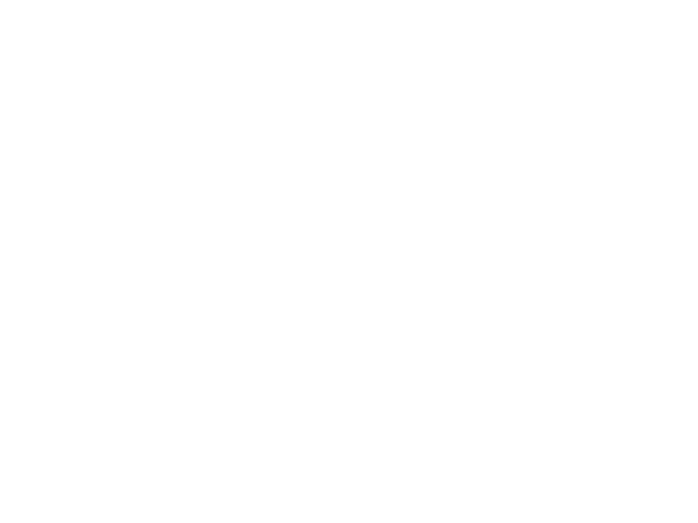

In [ ]:
%matplotlib notebook

import matplotlib

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import itertools

from matplotlib.artist import Artist

fig, axes_array = plt.subplots(nrows=3, ncols=2)
(ax1, ax2), (ax3, ax4), (ax5, ax6) = axes_array

def archive_plot_AdjMatrix(G_adjMatrix, iteration_number, ax,row_number_list=None, col_number_list=None, cell_idx_list=None, colour_list=plt.rcParams['axes.prop_cycle'].by_key()['color']):
    
    '''
    Purpose:
    Plot adjacency matrix of previous iteration.
    
    Params:
    row_number: row to box, indexing starting at 0.
    col_number: col to box, indexing starting at 0.
    
    Return:
    ax: Axes object with adjancency matrix plotted and row + col rectangles.
    '''
    
    G_adjMatrix_iterated = np.linalg.matrix_power(G_adjMatrix, iteration_number)
    col_count, row_count = G_adjMatrix_iterated.shape
    
#     ax.axis('scaled');
    ax.axis('off');
    
    matrix_row_ticks = np.flip(np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], row_count*2+1)[0::2]) #flip because min(ylim) demarcates top row
    matrix_col_ticks = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], col_count*2+1)[0::2]
    
    matrix_row_spacing = np.flip(np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], row_count*2+1)[1::2])  #flip because min(ylim) demarcates top row
    matrix_col_spacing = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], col_count*2+1)[1::2]
    matrix_spacing = list(itertools.product(matrix_col_spacing,matrix_row_spacing))
        
    for i, j in zip(G_adjMatrix_iterated.flatten(order='C'), matrix_spacing):
        ax.text(j[0], j[1], s=round(i,2),horizontalalignment='center',
                 verticalalignment='center');
    
    ax.set_title('Adj Matrix for Path of \nLength {}'.format(iteration_number), 
                 fontsize='small',
                 fontweight='semibold');
    
    if row_number_list!=None:
        for count, row_number in enumerate(row_number_list):
            rect_row = patches.Rectangle((matrix_col_ticks[0], matrix_row_ticks[row_number+1]),
                                         width=matrix_col_ticks[col_count]-matrix_col_ticks[0],
                                         height=matrix_row_ticks[row_number]-matrix_row_ticks[row_number+1],
                                         facecolor='none',
                                         edgecolor=colour_list[count % len(colour_list)]+'60',
                                         linewidth=2,
                                         clip_on=False)

            ax.add_patch(rect_row);    
    
    if col_number_list!=None:
        for count, col_number in enumerate(col_number_list):
            rect_col = patches.Rectangle((matrix_col_ticks[col_number+1], matrix_row_ticks[0]),
                                     width=matrix_col_ticks[col_number]-matrix_col_ticks[col_number+1],
                                     height=matrix_row_ticks[row_count]-matrix_row_ticks[0],
                                     facecolor='none',
                                     edgecolor=colour_list[count % len(colour_list)]+'60',
                                     linewidth=2,
                                     clip_on=False,
                                        )


            ax.add_patch(rect_col);
    
    if cell_idx_list!=None:
        for count, cell_idx in enumerate(cell_idx_list):
            rect_cell = patches.Rectangle((matrix_col_ticks[cell_idx[1]+1],matrix_row_ticks[cell_idx[0]+1]),
                                          width=matrix_col_ticks[cell_idx[0]]-matrix_col_ticks[cell_idx[0]+1],
                                          height=matrix_row_ticks[cell_idx[0]]-matrix_row_ticks[cell_idx[0]+1],
                                          facecolor='none',
                                          edgecolor=colour_list[count % len(colour_list)],
                                          linewidth=2,
                                          clip_on=False,
                                         )
            ax.add_patch(rect_cell);
    
    return ax

# plot_previousIterationAdjMatrix(G2_adjMatrix, iteration_number=5, row_number=3, col_number=2, ax=ax2)


from IPython.display import SVG, Image
import cairosvg
from io import BytesIO

def plot_iGraphAsSubplot(G, bbox_params, ax):
    originalPlot = igraph.plot(G, bbox=bbox_params)
    pngPlot = BytesIO(cairosvg.svg2png(originalPlot._repr_svg_()))
    pngPlot_read = plt.imread(pngPlot)
    ax.imshow(pngPlot_read, interpolation='spline36');
    ax.axis('off');
    return ax

# plot_AdjMatrix(G1_adjMatrix, iteration_number=1, row_number=1, ax=ax1);
# plot_iGraphAsSubplot(G1, (200,200), ax2);

# plot_AdjMatrix(G1_adjMatrix, iteration_number=3, ax=ax3);
# plot_iGraphAsSubplot(G1, (200,200), ax4);

# plot_AdjMatrix(G1_adjMatrix, iteration_number=4, cell_idx_list=[(0,2), (3,2)], ax=ax5);
# plot_iGraphAsSubplot(G1, (200,200), ax6);


In [63]:
%matplotlib notebook
from ipywidgets import widgets, Layout, HBox, VBox
import traitlets
from functools import partial

input_iteration_number = 8
input_adjMatrix = G1_adjMatrix
cache_adjMatrix = {1:G1_adjMatrix}

class RevealAccess:
    
    def __init__(self, initval=None, name='var'):
        self.val = initval
        self.name=name
    
    def __get__(self, obj, objtype):
#         print('Retrieving', self.name)
        return self.val
    
    def __set__(self, obj, val):
#         print('Updating', self.name)
        self.val = val

class AdjMatricesVisualisationMeta(type):
    
    origin_node = RevealAccess(0,'var "origin_node"')
    destination_node = RevealAccess(0,'var "destination_node"')
    
    axes_array = RevealAccess([], 'var "axes_array"')
    adjMatrix = RevealAccess(np.empty([0,0]),'var "adjMatrix"')
    
    cache_adjMatrices = RevealAccess({}, 'var "cache_adjMatrices"') #do NOT clear when you explore a new cell in final adjMatrix
    cache_relevantCells = RevealAccess({}, 'var "cache_relevantCells"') #clear each time you explore a new cell in final adjMatrix

    max_iteration_count = RevealAccess(1, 'var "max_iteration_count"')
    iteration_number = RevealAccess(1, 'var "iteration_number"')
    button_objects = RevealAccess([], 'var "button_objects"') #enclosed here instead of ScrollGraphButtons because SelectMatrixCellButton will call method too
    
#     temp_multiplicationResults = RevealAccess({}, 'temp_var multiplicationResults')
    df_edgelist = RevealAccess(pd.DataFrame(columns=['from', 'to', 'iteration_number', 'paths_from_origin']), 'var "df_edgelist"')

#     relevant_cells = RevealAccess([], 'var "relevant_cells"')
#     relevant_cells_archive = RevealAccess([], 'var "relevant_cells_archive"')
    
    def plot_AdjMatrix(cls, 
                       G_adjMatrix_iterated, 
                       ax,
                       iteration_number=None,
                       row_number_list=None, 
                       col_number_list=None, 
                       cell_idx_list=None, 
                       colour_list=plt.rcParams['axes.prop_cycle'].by_key()['color']):
        '''
        Purpose:
        Plot adjacency matrix of previous iteration.

        Params:
        row_number: row to box, indexing starting at 0.
        col_number: col to box, indexing starting at 0.

        Return:
        ax: Axes object with adjancency matrix plotted and row + col rectangles.
        '''

        col_count, row_count = G_adjMatrix_iterated.shape

        ax.axis('off');

        matrix_row_ticks = np.flip(np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], row_count*2+1)[0::2]) #flip because min(ylim) demarcates top row
        matrix_col_ticks = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], col_count*2+1)[0::2]

        matrix_row_spacing = np.flip(np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], row_count*2+1)[1::2])  #flip because min(ylim) demarcates top row
        matrix_col_spacing = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], col_count*2+1)[1::2]
        matrix_spacing = list(itertools.product(matrix_col_spacing,matrix_row_spacing))

        for i, j in zip(G_adjMatrix_iterated.flatten(order='C'), matrix_spacing):
            ax.text(j[0], j[1], s=round(i,2),horizontalalignment='center',
                     verticalalignment='center');

        ax.set_title('Adj Matrix for Path of \nLength {}'.format(iteration_number), 
                     fontsize='small',
                     fontweight='semibold');

        if row_number_list!=None:
            for count, row_number in enumerate(row_number_list):
                rect_row = patches.Rectangle((matrix_col_ticks[0], matrix_row_ticks[row_number+1]),
                                             width=matrix_col_ticks[col_count]-matrix_col_ticks[0],
                                             height=matrix_row_ticks[row_number]-matrix_row_ticks[row_number+1],
                                             facecolor='none',
                                             edgecolor=colour_list[count % len(colour_list)]+'60',
                                             linewidth=2,
                                             clip_on=False)

                ax.add_patch(rect_row);    

        if col_number_list!=None:
            for count, col_number in enumerate(col_number_list):
                rect_col = patches.Rectangle((matrix_col_ticks[col_number+1], matrix_row_ticks[0]),
                                         width=matrix_col_ticks[col_number]-matrix_col_ticks[col_number+1],
                                         height=matrix_row_ticks[row_count]-matrix_row_ticks[0],
                                         facecolor='none',
                                         edgecolor=colour_list[count % len(colour_list)]+'60',
                                         linewidth=2,
                                         clip_on=False,
                                            )


                ax.add_patch(rect_col);

        if cell_idx_list!=None:
            for count, cell_idx in enumerate(cell_idx_list):
                rect_cell = patches.Rectangle((matrix_col_ticks[cell_idx[1]+1],matrix_row_ticks[cell_idx[0]+1]),
                                              width=matrix_col_ticks[cell_idx[0]]-matrix_col_ticks[cell_idx[0]+1],
                                              height=matrix_row_ticks[cell_idx[0]]-matrix_row_ticks[cell_idx[0]+1],
                                              facecolor='none',
                                              edgecolor=colour_list[count % len(colour_list)],
                                              linewidth=2,
                                              clip_on=False,
                                             )
                ax.add_patch(rect_cell);

        return 0
    
    def plot_AdjMatrixToCell(cls, *args,
                        iteration_number=None, 
                        cell_idx_list=[]):

        '''
        Purpose:
        Plot on axes_array[0:2] the transition and outcome matrices.
        ?Plot on axes_array[3] the graph.

        Dependent functions:
        plot_AdjMatrix

        Return:
        Axes
        Transition Matrices, which will be passed to another func for calculating graph

        '''
        
        if iteration_number is None:
            iteration_number = cls.max_iteration_count
               
        #Clear axes
        for ax in cls.axes_array:
            ax.clear()
        
       
        #Set up cache

        if iteration_number not in cls.cache_adjMatrices:
            cls.cache_adjMatrices[iteration_number] = np.linalg.matrix_power(cls.adjMatrix, iteration_number)
        if iteration_number-1 not in cls.cache_adjMatrices:
            cls.cache_adjMatrices[iteration_number-1] = np.linalg.matrix_power(cls.adjMatrix, iteration_number-1)
        
        #Plot 3 plots       
        cls.plot_AdjMatrix(cls.cache_adjMatrices[iteration_number], cell_idx_list=cell_idx_list, ax=cls.axes_array[2], iteration_number=iteration_number)
        cls.plot_AdjMatrix(cls.cache_adjMatrices[iteration_number-1], col_number_list=[cell[1] for cell in cell_idx_list], ax=cls.axes_array[1], iteration_number=iteration_number-1)
        cls.plot_AdjMatrix(cls.cache_adjMatrices[1], row_number_list=[cell[0] for cell in cell_idx_list], ax=cls.axes_array[0], iteration_number=1)
        
        
        return 0

    
    
    def plot_IterationGraph(cls, b, **kwargs):
        '''
        Params:
        
        cls: class of button instance that called func
        
        b: button instance (or object) that called func\
        included, unlike for plot_AdjMatrixToCell\
        because this func can only be called by
        button instance
        
        '''
        if b.value>=1 and b.value<=cls.max_iteration_count:
            

            cls.iteration_number = b.value
            

            if b.button_type == 'decrease':

                #Get relevant cells from iteration_number-1 adj_matrix
                if cls.iteration_number not in cls.cache_adjMatrices:
                    cls.cache_adjMatrices[cls.iteration_number-1] = np.linalg.matrix_power(cls.adjMatrix, cls.iteration_number)
                if cls.iteration_number-1 not in cls.cache_adjMatrices:
                    cls.cache_adjMatrices[cls.iteration_number-1] = np.linalg.matrix_power(cls.adjMatrix, cls.iteration_number-1)

                if cls.iteration_number not in cls.cache_relevantCells:
                
                    new_relevant_cells = []
                    from_node = []
                    to_node = []
                    paths_from_origin = []

                    for relevant_cell in cls.cache_relevantCells[cls.iteration_number+1]:
                        row_no, col_no = relevant_cell
                        col_vector = cls.cache_adjMatrices[cls.iteration_number][:,col_no]
                        row_vector = cls.cache_adjMatrices[1][row_no,:]
                        multiplication_result = col_vector * row_vector
                        non_zero_idx = np.nonzero(multiplication_result)[0]                        

                        for idx in non_zero_idx:
                            from_node.append(idx)
                            to_node.append(row_no)
                            paths_from_origin.append(multiplication_result[idx])
                            if (idx, col_no) not in new_relevant_cells:
                                new_relevant_cells.append((idx, col_no)) #idx represents row
                    
                    
                    cls.cache_relevantCells[cls.iteration_number] = new_relevant_cells
                

                    cls.df_edgelist  = pd.DataFrame(list(zip(cls.df_edgelist ['from'].tolist()+from_node, 
                                                           cls.df_edgelist['to'].tolist()+to_node, 
                                                           cls.df_edgelist['iteration_number'].tolist()+[cls.iteration_number+1]*len(from_node),
                                                           cls.df_edgelist['paths_from_origin'].tolist()+paths_from_origin),
                                                       ), 
                                                   columns=cls.df_edgelist.columns)

                
            df_edgelist_copy = cls.df_edgelist.copy()
            df_edgelist_revised = cls.revise_df_originAndFilter(df = df_edgelist_copy)
            cls.plot_AdjMatrixToCell(cls.cache_adjMatrices[cls.iteration_number], cell_idx_list=cls.cache_relevantCells[cls.iteration_number], iteration_number=cls.iteration_number)           
                               
                
            cls.updateAllButtons()
            cls.plot_Graph(edgelist = df_edgelist_revised)   
                       
        else:
            print('Not plotting, where b.value is {}, at cls.iteration_number {}.'.format(b.value, cls.iteration_number))
        
        return 0
    
    def revise_df_originAndFilter(cls, df):
        
        '''
        Purpose 1: Filter out edges whose iteration_number is irrelevant.
        Purpose 2: Create edges to connect origin_node to whichever node is left
        '''
                  
        df = df.loc[df['iteration_number']>=cls.iteration_number+1,:]
        to_node = list(df.loc[df['iteration_number']==cls.iteration_number+1,'from'].unique())
        from_node = [cls.origin_node] * len(to_node)
#         display([cell[0] for cell in cls.cache_relevantCells[cls.iteration_number]])
#         display([cell[1] for cell in cls.cache_relevantCells[cls.iteration_number]])
#         to_node = [cell[0] for cell in cls.cache_relevantCells[cls.iteration_number]]
        paths_from_origin = [cls.adjMatrix[cell[0], cls.origin_node] for cell in cls.cache_relevantCells[cls.iteration_number]]
        
        display(to_node)
        display(from_node)
        display(paths_from_origin)
        
        df = pd.DataFrame(list(zip(df['from'].tolist()+from_node,
                                   df['to'].tolist()+to_node,
                                   df['iteration_number'].tolist()+[1]*len(to_node),
                                   df['paths_from_origin'].tolist()+paths_from_origin),
                              ),
                          columns=df.columns)
        
        display(df)
        
        return df
    
    def plot_Graph(cls, edgelist):
        
        df = edgelist.copy()
        df.sort_values(['iteration_number', 'to'], inplace=True)
        df['from'] = df['from'].astype(str) + '-Layer' + (df['iteration_number']-1).astype(str)
        
        df['to'] = df['to'].astype(str) + '-Layer' + df['iteration_number'].astype(str)
        next_largest = df['iteration_number'].unique()[1] - 1
        display(next_largest)
        
        df.loc[df['iteration_number']==1, 'to'] = df.loc[df['iteration_number']==1, 'to'].str.replace(r'Layer[0-9]+','Layer'+str(next_largest))
        
        edge_list_tuples = [tuple(row) for row in df.iloc[:,:-1].values]
        
        display(df)
        G = igraph.Graph.TupleList(edge_list_tuples, directed=True, edge_attrs='weights')

        G.vs['layer'] = [int(x[-1]) for x in G.vs['name']]
        G.vs['name'] = [x[:1] for x in G.vs['name']]

        layout = G.layout('sugiyama', layers='layer', maxiter=0, hgap=0.1)

        visual_kwargs = {'bbox': (400,600),
                         'margin': 50,
                         'vertex_label':G.vs['name'],
                         'vertex_color': 'light grey',
                        'layout':layout,
                         'edge_arrow_size':0.6}

        output = BytesIO()
        p = igraph.plot(G, **visual_kwargs);
        p.save(output);
        image = Image.open(output);
        display(image)

        
    
    def updateAllButtons(cls, *args, reset=False):
        
        if not reset:
            for buttonObj in cls.button_objects:
                if buttonObj.button_type=='decrease':
                    buttonObj.value = cls.iteration_number-1
                elif buttonObj.button_type=='increase':
                    buttonObj.value = cls.iteration_number+1
        
        elif reset:
            for buttonObj in cls.button_objects:
                if buttonObj.button_type=='decrease':
                    buttonObj.value = cls.max_iteration_count-1
                elif buttonObj.button_type=='increase':
                    buttonObj.value = cls.max_iteration_count+1
            
            cls.iteration_number = cls.max_iteration_count #shld be somewhere else, but leave it here for now
        
        return 0

class NoConflictMeta(AdjMatricesVisualisationMeta, traitlets.traitlets.MetaHasTraits):
    pass

In [64]:
class SelectMatrixCellButton(widgets.Button, metaclass=NoConflictMeta):
    
#     #Class attribute
#     __axes_array = []

    def __init__(self, *args, value, **kwargs):
                
        super().__init__(*args, **kwargs)
        
        self.value = value
        
        '''
        Order of on_click backcalls/functions matter.
        '''
        
        self.on_click(partial(type(self).updateAllButtons,reset=True))
                
        self.on_click(partial(type(self).plot_AdjMatrixToCell, 
                              cell_idx_list=[self.value]))
                
        self.on_click(partial(self.set_originDestination_nodes, origin_node=self.value[1], destination_node=self.value[0])
                     )
        
        self.on_click(partial(self.set_cache_relevantCells, cell_list = [self.value])
                     )
        
        self.on_click(self.reset_df_edgelist)

        
    
    def set_originDestination_nodes(self, b, origin_node, destination_node):
        type(self).origin_node = origin_node
        type(self).destination_node = destination_node
        return 0
    
    def set_cache_relevantCells(self, b, cell_list, iteration_number=None):
        
        #clear_cache
        type(self).cache_relevantCells.clear()
#         type(self).temp_multiplicationResults.clear()
        
        if iteration_number==None:
            iteration_number=type(self).iteration_number
        type(self).cache_relevantCells[iteration_number] = cell_list
        return 0
    
    def reset_df_edgelist(self, b):
        type(self).df_edgelist = pd.DataFrame(columns=['from', 'to', 'iteration_number', 'paths_from_origin'])

<IPython.core.display.Javascript object>


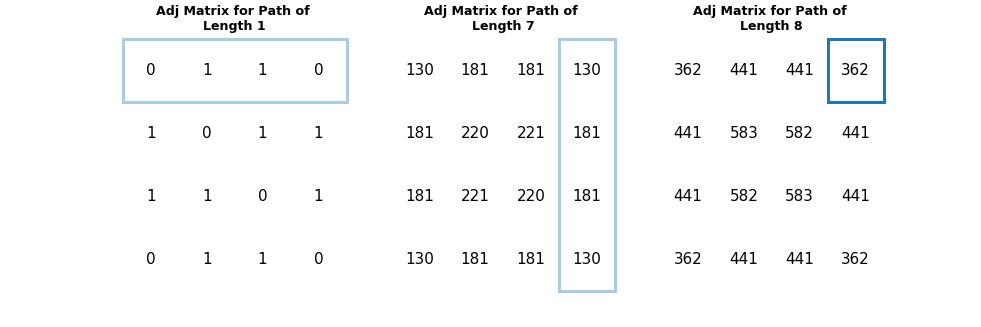

[1, 2]

[3, 3]

[1, 1]

,from,to,iteration_number,paths_from_origin
0,1,0,8,181
1,2,0,8,181
2,3,1,1,1
3,3,2,1,1


7

,from,to,iteration_number,paths_from_origin
2,3-Layer0,1-Layer7,1,1
3,3-Layer0,2-Layer7,1,1
0,1-Layer7,0-Layer8,8,181
1,2-Layer7,0-Layer8,8,181


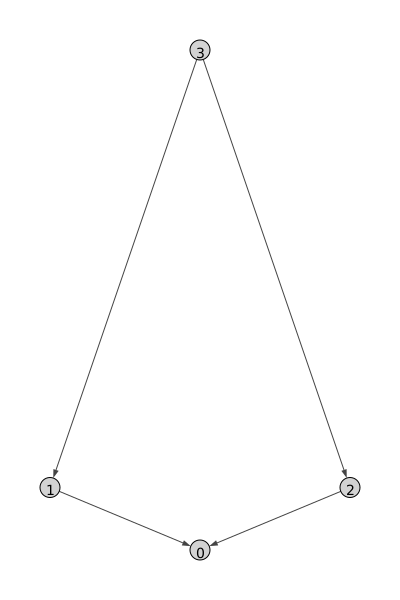

[0, 2, 3, 1]

[3, 3, 3, 3]

[0, 1, 0, 1]

,from,to,iteration_number,paths_from_origin
0,1,0,8,181
1,2,0,8,181
2,0,1,7,58
3,2,1,7,65
4,3,1,7,58
5,0,2,7,58
6,1,2,7,65
7,3,2,7,58
8,3,0,1,0
9,3,2,1,1


6

,from,to,iteration_number,paths_from_origin
8,3-Layer0,0-Layer6,1,0
11,3-Layer0,1-Layer6,1,1
9,3-Layer0,2-Layer6,1,1
10,3-Layer0,3-Layer6,1,0
2,0-Layer6,1-Layer7,7,58
3,2-Layer6,1-Layer7,7,65
4,3-Layer6,1-Layer7,7,58
5,0-Layer6,2-Layer7,7,58
6,1-Layer6,2-Layer7,7,65
7,3-Layer6,2-Layer7,7,58


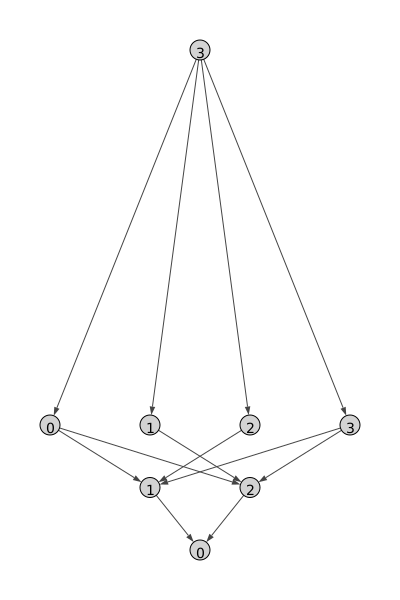

[1, 2, 0, 3]

[3, 3, 3, 3]

[1, 1, 0, 0]

,from,to,iteration_number,paths_from_origin
0,1,0,8,181
1,2,0,8,181
2,0,1,7,58
3,2,1,7,65
4,3,1,7,58
5,0,2,7,58
6,1,2,7,65
7,3,2,7,58
8,1,0,6,29
9,2,0,6,29


5

,from,to,iteration_number,paths_from_origin
20,3-Layer0,0-Layer5,1,0
18,3-Layer0,1-Layer5,1,1
19,3-Layer0,2-Layer5,1,1
21,3-Layer0,3-Layer5,1,0
8,1-Layer5,0-Layer6,6,29
9,2-Layer5,0-Layer6,6,29
15,0-Layer5,1-Layer6,6,18
16,2-Layer5,1-Layer6,6,29
17,3-Layer5,1-Layer6,6,18
10,0-Layer5,2-Layer6,6,18


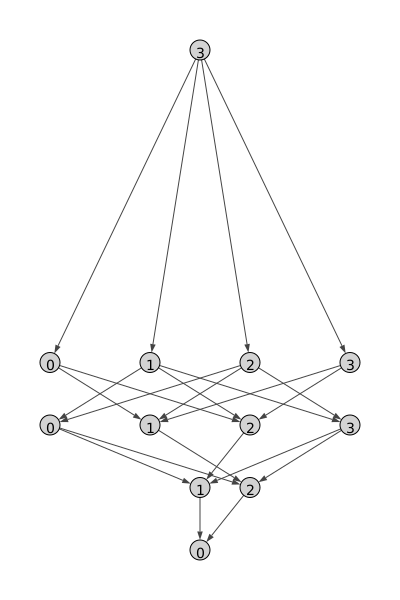

[0, 2, 3, 1]

[3, 3, 3, 3]

[0, 1, 0, 1]

,from,to,iteration_number,paths_from_origin
0,1,0,8,181
1,2,0,8,181
2,0,1,7,58
3,2,1,7,65
4,3,1,7,58
5,0,2,7,58
6,1,2,7,65
7,3,2,7,58
8,1,0,6,29
9,2,0,6,29


4

,from,to,iteration_number,paths_from_origin
28,3-Layer0,0-Layer4,1,0
31,3-Layer0,1-Layer4,1,1
29,3-Layer0,2-Layer4,1,1
30,3-Layer0,3-Layer4,1,0
24,1-Layer4,0-Layer5,5,9
25,2-Layer4,0-Layer5,5,9
18,0-Layer4,1-Layer5,5,10
19,2-Layer4,1-Layer5,5,9
20,3-Layer4,1-Layer5,5,10
21,0-Layer4,2-Layer5,5,10


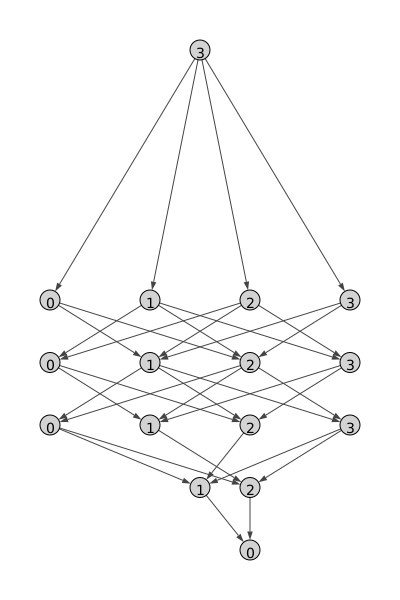

[1, 2, 0, 3]

[3, 3, 3, 3]

[1, 1, 0, 0]

,from,to,iteration_number,paths_from_origin
0,1,0,8,181
1,2,0,8,181
2,0,1,7,58
3,2,1,7,65
4,3,1,7,58
5,0,2,7,58
6,1,2,7,65
7,3,2,7,58
8,1,0,6,29
9,2,0,6,29


3

,from,to,iteration_number,paths_from_origin
40,3-Layer0,0-Layer3,1,0
38,3-Layer0,1-Layer3,1,1
39,3-Layer0,2-Layer3,1,1
41,3-Layer0,3-Layer3,1,0
28,1-Layer3,0-Layer4,4,5
29,2-Layer3,0-Layer4,4,5
35,0-Layer3,1-Layer4,4,2
36,2-Layer3,1-Layer4,4,5
37,3-Layer3,1-Layer4,4,2
30,0-Layer3,2-Layer4,4,2


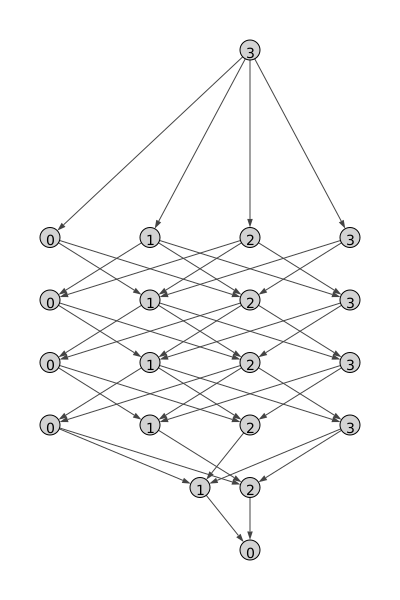

[0, 2, 3, 1]

[3, 3, 3, 3]

[0, 1, 0, 1]

,from,to,iteration_number,paths_from_origin
0,1,0,8,181
1,2,0,8,181
2,0,1,7,58
3,2,1,7,65
4,3,1,7,58
5,0,2,7,58
6,1,2,7,65
7,3,2,7,58
8,1,0,6,29
9,2,0,6,29


2

,from,to,iteration_number,paths_from_origin
48,3-Layer0,0-Layer2,1,0
51,3-Layer0,1-Layer2,1,1
49,3-Layer0,2-Layer2,1,1
50,3-Layer0,3-Layer2,1,0
44,1-Layer2,0-Layer3,3,1
45,2-Layer2,0-Layer3,3,1
38,0-Layer2,1-Layer3,3,2
39,2-Layer2,1-Layer3,3,1
40,3-Layer2,1-Layer3,3,2
41,0-Layer2,2-Layer3,3,2


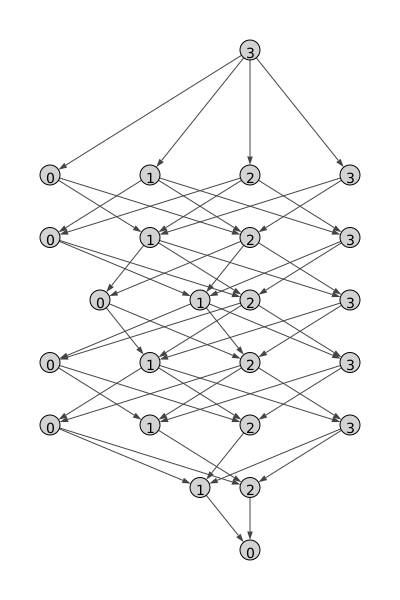

[1, 2]

[3, 3]

[1, 1]

,from,to,iteration_number,paths_from_origin
0,1,0,8,181
1,2,0,8,181
2,0,1,7,58
3,2,1,7,65
4,3,1,7,58
5,0,2,7,58
6,1,2,7,65
7,3,2,7,58
8,1,0,6,29
9,2,0,6,29


1

,from,to,iteration_number,paths_from_origin
54,3-Layer0,1-Layer1,1,1
55,3-Layer0,2-Layer1,1,1
48,1-Layer1,0-Layer2,2,1
49,2-Layer1,0-Layer2,2,1
53,2-Layer1,1-Layer2,2,1
50,1-Layer1,2-Layer2,2,1
51,1-Layer1,3-Layer2,2,1
52,2-Layer1,3-Layer2,2,1
44,1-Layer2,0-Layer3,3,1
45,2-Layer2,0-Layer3,3,1


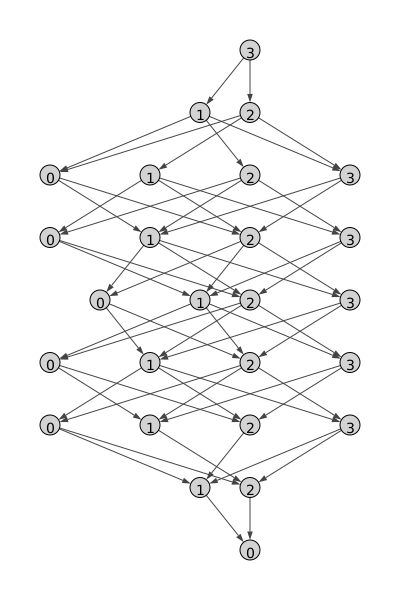

Not plotting, where b.value is 0, at cls.iteration_number 1.
Not plotting, where b.value is 0, at cls.iteration_number 1.
Not plotting, where b.value is 0, at cls.iteration_number 1.


[0, 2, 3, 1]

[3, 3, 3, 3]

[0, 1, 0, 1]

,from,to,iteration_number,paths_from_origin
0,1,0,8,181
1,2,0,8,181
2,0,1,7,58
3,2,1,7,65
4,3,1,7,58
5,0,2,7,58
6,1,2,7,65
7,3,2,7,58
8,1,0,6,29
9,2,0,6,29


2

,from,to,iteration_number,paths_from_origin
48,3-Layer0,0-Layer2,1,0
51,3-Layer0,1-Layer2,1,1
49,3-Layer0,2-Layer2,1,1
50,3-Layer0,3-Layer2,1,0
44,1-Layer2,0-Layer3,3,1
45,2-Layer2,0-Layer3,3,1
38,0-Layer2,1-Layer3,3,2
39,2-Layer2,1-Layer3,3,1
40,3-Layer2,1-Layer3,3,2
41,0-Layer2,2-Layer3,3,2


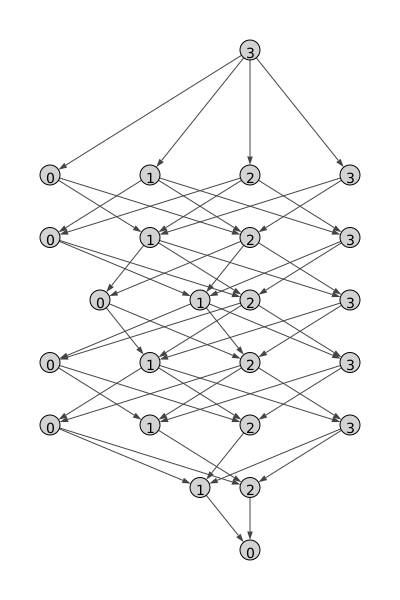

[1, 2, 0, 3]

[3, 3, 3, 3]

[1, 1, 0, 0]

,from,to,iteration_number,paths_from_origin
0,1,0,8,181
1,2,0,8,181
2,0,1,7,58
3,2,1,7,65
4,3,1,7,58
5,0,2,7,58
6,1,2,7,65
7,3,2,7,58
8,1,0,6,29
9,2,0,6,29


3

,from,to,iteration_number,paths_from_origin
40,3-Layer0,0-Layer3,1,0
38,3-Layer0,1-Layer3,1,1
39,3-Layer0,2-Layer3,1,1
41,3-Layer0,3-Layer3,1,0
28,1-Layer3,0-Layer4,4,5
29,2-Layer3,0-Layer4,4,5
35,0-Layer3,1-Layer4,4,2
36,2-Layer3,1-Layer4,4,5
37,3-Layer3,1-Layer4,4,2
30,0-Layer3,2-Layer4,4,2


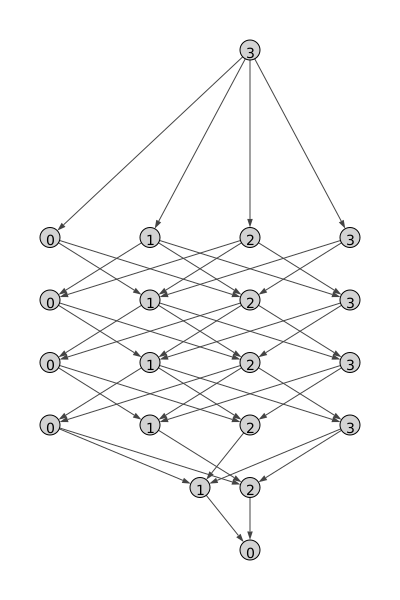

[0, 2, 3, 1]

[3, 3, 3, 3]

[0, 1, 0, 1]

,from,to,iteration_number,paths_from_origin
0,1,0,8,181
1,2,0,8,181
2,0,1,7,58
3,2,1,7,65
4,3,1,7,58
5,0,2,7,58
6,1,2,7,65
7,3,2,7,58
8,1,0,6,29
9,2,0,6,29


4

,from,to,iteration_number,paths_from_origin
28,3-Layer0,0-Layer4,1,0
31,3-Layer0,1-Layer4,1,1
29,3-Layer0,2-Layer4,1,1
30,3-Layer0,3-Layer4,1,0
24,1-Layer4,0-Layer5,5,9
25,2-Layer4,0-Layer5,5,9
18,0-Layer4,1-Layer5,5,10
19,2-Layer4,1-Layer5,5,9
20,3-Layer4,1-Layer5,5,10
21,0-Layer4,2-Layer5,5,10


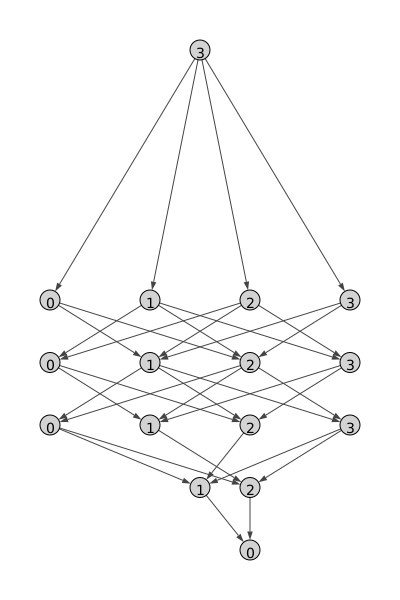

[1, 2, 0, 3]

[3, 3, 3, 3]

[1, 1, 0, 0]

,from,to,iteration_number,paths_from_origin
0,1,0,8,181
1,2,0,8,181
2,0,1,7,58
3,2,1,7,65
4,3,1,7,58
5,0,2,7,58
6,1,2,7,65
7,3,2,7,58
8,1,0,6,29
9,2,0,6,29


5

,from,to,iteration_number,paths_from_origin
20,3-Layer0,0-Layer5,1,0
18,3-Layer0,1-Layer5,1,1
19,3-Layer0,2-Layer5,1,1
21,3-Layer0,3-Layer5,1,0
8,1-Layer5,0-Layer6,6,29
9,2-Layer5,0-Layer6,6,29
15,0-Layer5,1-Layer6,6,18
16,2-Layer5,1-Layer6,6,29
17,3-Layer5,1-Layer6,6,18
10,0-Layer5,2-Layer6,6,18


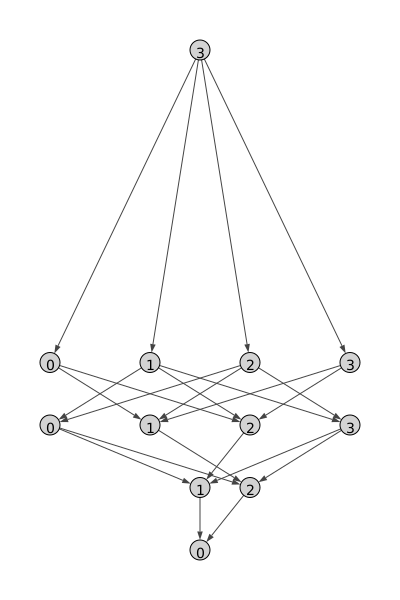

[0, 2, 3, 1]

[3, 3, 3, 3]

[0, 1, 0, 1]

,from,to,iteration_number,paths_from_origin
0,1,0,8,181
1,2,0,8,181
2,0,1,7,58
3,2,1,7,65
4,3,1,7,58
5,0,2,7,58
6,1,2,7,65
7,3,2,7,58
8,3,0,1,0
9,3,2,1,1


6

,from,to,iteration_number,paths_from_origin
8,3-Layer0,0-Layer6,1,0
11,3-Layer0,1-Layer6,1,1
9,3-Layer0,2-Layer6,1,1
10,3-Layer0,3-Layer6,1,0
2,0-Layer6,1-Layer7,7,58
3,2-Layer6,1-Layer7,7,65
4,3-Layer6,1-Layer7,7,58
5,0-Layer6,2-Layer7,7,58
6,1-Layer6,2-Layer7,7,65
7,3-Layer6,2-Layer7,7,58


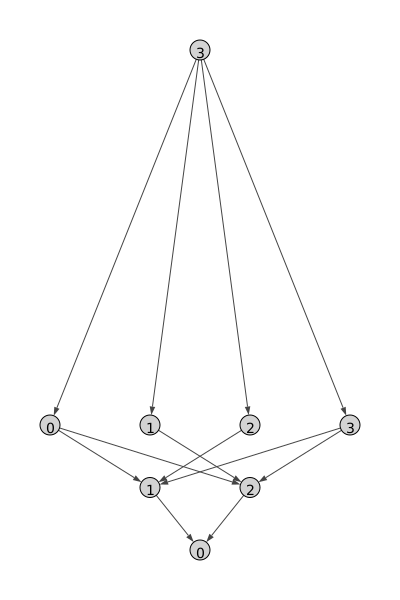

[1, 2]

[3, 3]

[1, 1]

,from,to,iteration_number,paths_from_origin
0,1,0,8,181
1,2,0,8,181
2,3,1,1,1
3,3,2,1,1


7

,from,to,iteration_number,paths_from_origin
2,3-Layer0,1-Layer7,1,1
3,3-Layer0,2-Layer7,1,1
0,1-Layer7,0-Layer8,8,181
1,2-Layer7,0-Layer8,8,181


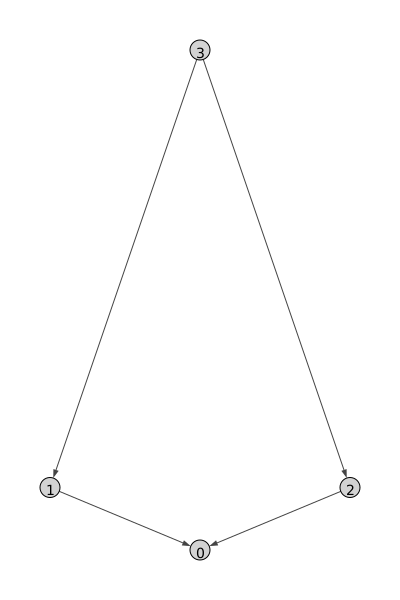

[]

[]

[0]

,from,to,iteration_number,paths_from_origin


IndexError: index 1 is out of bounds for axis 0 with size 0

In [66]:
display(HTML('<h1>What is the meaning behind the transformation of Adj Matrices?</h1>'))
matrix_buttons = [
    
    [
        SelectMatrixCellButton(
            description=str(cell),
            value=(row_idx, col_idx),
            layout=Layout(width='45px', height='45px')
        ) 
        
        for row_idx, cell in enumerate(col)
    ] 
    
    for col_idx, col in enumerate(np.linalg.matrix_power(input_adjMatrix, input_iteration_number))
]

box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    justify_content='center')

display(HBox(list(VBox(col) for col in matrix_buttons), layout=box_layout))

display(HTML('<h2>See How We Arrive at Adj Matrix for Path of Length {}</h2>'.format(input_iteration_number)))

fig, axes_array_display = plt.subplots(nrows=1, ncols=3, figsize=(9,3))
SelectMatrixCellButton.axes_array = axes_array_display
SelectMatrixCellButton.adjMatrix = G1_adjMatrix
SelectMatrixCellButton.cache_adjMatrices = {1:G1_adjMatrix}
SelectMatrixCellButton.max_iteration_count = input_iteration_number

class ScrollGraphButton(widgets.Button, metaclass=NoConflictMeta):
    
#     #Class attribute
#     __axes_array = []

#     button_objects = []
    
    def __init__(self, *args, button_type, **kwargs):
                
        super().__init__(*args, **kwargs)
        
        if button_type=='decrease':
            self.value = type(self).max_iteration_count-1
        elif button_type=='increase':
            self.value = type(self).max_iteration_count+1
        
        self.button_type = button_type
        self.__class__.button_objects.append(self)
        
        self.on_click(partial(type(self).plot_IterationGraph, 
                              iteration=self.value
                              )
                     )
    
#     @classmethod
#     def updateAllButtons(cls):
        
#         for buttonObj in cls.button_objects:
#             if buttonObj.button_type=='decrease':

#                 buttonObj.value = cls.iteration_number-1
#             elif buttonObj.button_type=='increase':

#                 buttonObj.value = cls.iteration_number+1
        
#         return 0

ScrollGraphButton.iteration_number = input_iteration_number
        
display(HBox(children=[ ScrollGraphButton(button_type='decrease', icon='arrow-left',layout=Layout(width='60px', height='60px')),
              ScrollGraphButton(button_type='increase',icon='arrow-right',layout=Layout(width='60px', height='60px'))],
                layout=Layout(justify_content='center'))            
            )

#Question: Actually, shld it be just Path Length?
#Have a button to trigger CalculateGraph for Step 6, and the option to back-track to Step 5,4,3,2,1.
#This function is conditional on the above matrices being picked.
#Calculate Graph will take Relevant Cell(s), their parent, from the preceding two graphs.
#Then add those cells and their parent to the edges. Their parent will be the next Relevant Cell.
#The area below Fig 1 will display the Graph.
#Fig1 will also update as we backtrack, to show the Relevant Cell(s) in the last panel, and the preceding two graphs.

'''
OK, let's try smth different.
Have an object with iGraph parent. Call this graph TraceGraph, because it traces how the eventual graph is formed.
TraceGraph has following attributes.
- AdjMatrix, which is calculated from original graph and its power/iteration.
- Original Graph. This is NOT an attribute of iGraph parent.
''';

'''
Or what about this.
To maintain the state, I have an array.
I include into the array, the graph for Start Node -> End Node.
Then as we go along, we calculate and insert the graph for Start Node -> 2nd Last Nodes -> End Node.

What info does the calculation need? How do I store the info?

Inputs for calculation:
1) The Relevant Column of preceding AdjMatrix.
2) The Relevant Row of the Original Matrix

Steps for calculation:
Multiply 1) and 2).
Get directed edge from a) Non-Zero INDEX of multiplication to b) Relevant Pt.
Add edges to Graph. Remove edge that is from Start Node -> Previously Last Node.

For inputs to calculation, how do we go about in an elegant way?
What is elegant?

''';

In [13]:
display(Markdown(
    r'''

## Making sense of how adjacency matrices change, between G1, G2, G3

We examine how **Node {{row}}** and **Node {{col}}** determine the number of edges at **Iteration {{iteration_number}}**.

Let's observe what changes in matrices:
$$ \begin{bmatrix}1\\0\end{bmatrix} $$

{{vectors[0][3]}}

Got to work out the dictionary bit.

OK, I'll continue tmr. The point is this.
- Each vector represents the connection from that node (i.e. row or col idx) to the other nodes.
- If this vector has a joint node, with another vector (e.g. '1' in the same node), then it shows that in the next iteration, the next hop, it is possible to move from the owner of that vector to that node (which owns the vector).

$$ \require{enclose} \enclose{circle}{x} $$

$$
\begin{bmatrix}
1 & 1 \\
2 & \smash{\fbox{a}} \\
\end{bmatrix}
$$

'''
))

%load_ext itikz



